In [261]:
# Math and Data Processing
import numpy as np
import pandas as pd

# Scipy
from scipy.cluster.hierarchy import dendrogram, linkage # Hierarchical Clustering

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.preprocessing import StandardScaler # Feature Scaling,
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans # k-mean clustering

In [7]:
"""Unsupervised techniques are often used in the analysis of genomic data.
In particular, PCA and hierarchical clustering are popular tools. We illustrate
these techniques on the NCI60 cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines."""
x = pd.read_csv('NCI60_X.csv', index_col=0)
y = pd.read_csv('NCI60_Y.csv', index_col=0)

In [11]:
"""Each cell line is labeled with a cancer type. We do not make use of the
cancer types in performing PCA and clustering, as these are unsupervised
techniques. But after performing PCA and clustering, we will check to
see the extent to which these cancer types agree with the results of these
unsupervised techniques."""

print(x.shape, y.shape)

(64, 6830) (64, 1)


In [12]:
x[:5]

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [23]:
y[:5]

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [24]:
# examining the cancer types for the cell lines
y['x'].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7A-repro    1
UNKNOWN        1
MCF7D-repro    1
K562A-repro    1
Name: x, dtype: int64

### PCA on the NCI60 Data

6830

<IPython.core.display.Javascript object>


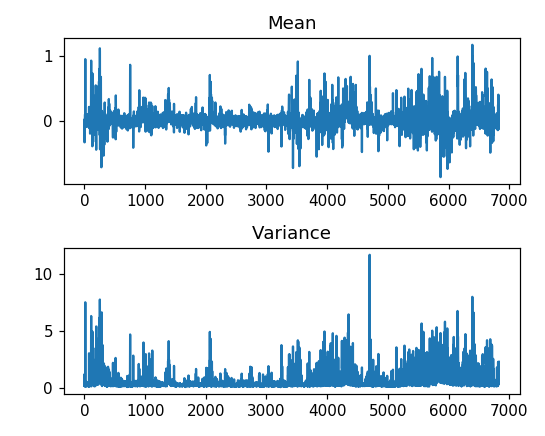

In [55]:
# Before scaling
# Let's have a look at average and variance of features
%matplotlib notebook
fig, axe = plt.subplots(2,1, figsize=(5,4))
axe[0].plot(range(x.shape[1]), x.mean())
axe[0].set_title('Mean')

axe[1].plot(range(x.shape[1]), x.var())
axe[1].set_title('Variance')

plt.tight_layout()

<IPython.core.display.Javascript object>


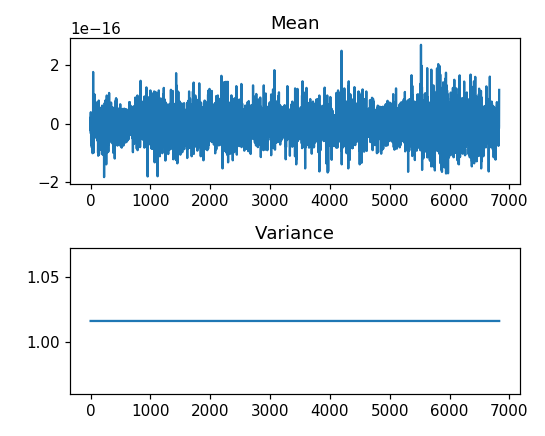

In [70]:
# Scaling
# Feature Scaling
sc = StandardScaler()
x_sc = sc.fit_transform(x.values)

df_sc = pd.DataFrame(data = x_sc, columns = x.columns)

# Mean and variance after scaling
%matplotlib notebook
fig, axe = plt.subplots(2,1, figsize=(5,4))
axe[0].plot(range(x.shape[1]), df_sc.mean())
axe[0].set_title('Mean')

axe[1].plot(range(x.shape[1]), df_sc.var().round(4))
axe[1].set_title('Variance')

plt.tight_layout()

In [73]:
#We now plot the first few principal component score vectors, in order to visualize the data.

pca = PCA()

# Fit the model and transform
x_sc_pca = pca.fit_transform(x_sc)

# Look at principal components
pca.components_

array([[-0.01068237, -0.00231208, -0.00587975, ..., -0.00197109,
         0.00779109,  0.00771462],
       [-0.00132441, -0.00167527,  0.00628943, ..., -0.00937144,
        -0.00231535,  0.00354385],
       [ 0.00850351,  0.01025659,  0.01005541, ...,  0.01049791,
         0.02013372,  0.01815808],
       ...,
       [ 0.02337703, -0.00246957,  0.01216671, ...,  0.00040545,
         0.00067878, -0.0159314 ],
       [ 0.01131504, -0.02353899,  0.02160489, ...,  0.00559842,
        -0.00780919, -0.02065693],
       [-0.01988612,  0.10087096, -0.0838007 , ...,  0.00079542,
         0.00028562, -0.00201865]])

In [75]:
df_pca = pd.DataFrame(data = x_sc_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.781496e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.781496e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.781496e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.781496e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.781496e-14


In [113]:
def custom_labels():
    # Custom legend for labels
    handles = []
    labels = pd.factorize(y['x'].unique()) # label[0] contains numeric labels from 0 to 13, 
                                       # label[1] contains names of classes

    norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
    for i, v in zip(labels[0], labels[1]):
        handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    
    return handles

<IPython.core.display.Javascript object>


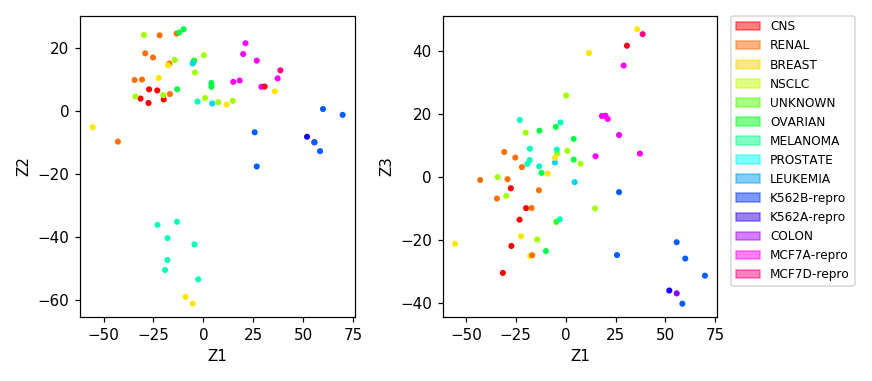

In [124]:
%matplotlib notebook
fig, axe = plt.subplots(1,2, figsize = (8,3.5))

#We need to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.
color_idx = pd.factorize(y['x'])[0]
cmap = plt.cm.hsv


axe[0].scatter(df_pca.iloc[:,0], -df_pca.iloc[:,1], c=color_idx, cmap=cmap, marker = '.')
axe[0].set_xlabel('Z1')
axe[0].set_ylabel('Z2')


axe[1].scatter(df_pca.iloc[:,0], df_pca.iloc[:,2], c=color_idx, cmap=cmap, marker = '.')
axe[1].set_xlabel('Z1')
axe[1].set_ylabel('Z3')

# Custom legend for labels
handles = custom_labels()
axe[1].legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=8)

plt.tight_layout()

In [211]:
# proportion of variance explained (PVE)
proportion = pca.explained_variance_ratio_
proportion

array([1.13589419e-01, 6.75620253e-02, 5.75184223e-02, 4.24755448e-02,
       3.73497235e-02, 3.61863019e-02, 3.06622240e-02, 2.68590309e-02,
       2.52949807e-02, 2.37586884e-02, 2.35655815e-02, 2.16412198e-02,
       2.04909747e-02, 1.97881793e-02, 1.91541737e-02, 1.77176082e-02,
       1.66272971e-02, 1.61075898e-02, 1.59433320e-02, 1.55991861e-02,
       1.50721674e-02, 1.48009892e-02, 1.43576234e-02, 1.36277104e-02,
       1.32350200e-02, 1.27519917e-02, 1.25903703e-02, 1.20979413e-02,
       1.18098781e-02, 1.12098170e-02, 1.08277440e-02, 1.04477523e-02,
       1.02647051e-02, 9.88274535e-03, 9.74257138e-03, 9.31114503e-03,
       9.14795316e-03, 8.95640894e-03, 8.72950586e-03, 8.42575751e-03,
       8.13979814e-03, 7.89749805e-03, 7.39000998e-03, 7.20101586e-03,
       7.08918353e-03, 6.90272334e-03, 6.78495251e-03, 6.47012955e-03,
       6.40883777e-03, 6.01193511e-03, 5.66418607e-03, 5.63402788e-03,
       5.38935217e-03, 5.12786334e-03, 5.11796180e-03, 4.81620125e-03,
      

In [216]:
"""A summary of the proportion of variance explained (PVE)
of the first few principal components:"""
num_pc = 10
col_names = ['PC ' + str(i) for i in range(1, num_pc+1)]
std = df_pca.std(axis = 0)
var = df_pca.var(axis = 0)
df_summary = pd.DataFrame(data = np.array([var[:num_pc], 
                                           std[:num_pc], 
                                           proportion[:num_pc], 
                                           np.cumsum(proportion[:num_pc])]), 
                          columns=col_names, index = ['Variance', 'STD', 'PVE', 'Cumulative PVE'])
df_summary

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
Variance,788.130264,468.773214,399.086552,294.712859,259.147796,251.075497,212.747164,186.359041,175.507015,164.847585
STD,28.073658,21.651171,19.977151,17.167203,16.098068,15.845362,14.585855,13.651338,13.247906,12.839298
PVE,0.113589,0.067562,0.057518,0.042476,0.037350,0.036186,0.030662,0.026859,0.025295,0.023759
Cumulative PVE,0.113589,0.181151,0.238670,0.281145,0.318495,0.354681,0.385344,0.412203,0.437498,0.461256


In [225]:
df_summary.iloc[1,:]

PC 1     28.073658
PC 2     21.651171
PC 3     19.977151
PC 4     17.167203
PC 5     16.098068
PC 6     15.845362
PC 7     14.585855
PC 8     13.651338
PC 9     13.247906
PC 10    12.839298
Name: STD, dtype: float64

<IPython.core.display.Javascript object>


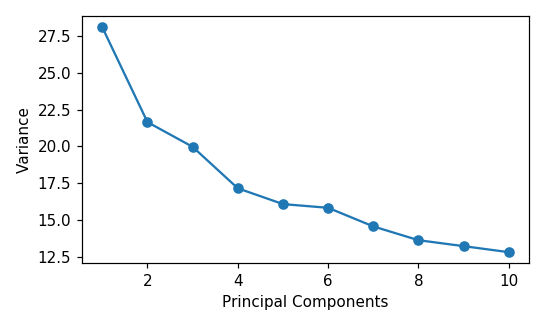

In [230]:
# Lets plot the variance explained by the first few principal components.
%matplotlib notebook
plt.figure(figsize = (5,3))
plt.plot(range(1, num_pc+1), df_summary.iloc[1,:], marker = 'o')
plt.xlabel('Principal Components')
plt.ylabel('Variance')
plt.tight_layout()

<IPython.core.display.Javascript object>


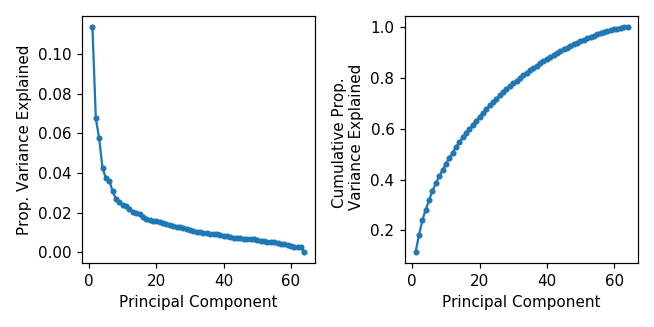

In [231]:
%matplotlib notebook
fig, axe = plt.subplots(1, 2, figsize = (6, 3))
axe[0].plot(range(1, len(proportion)+1), proportion, marker = '.')
axe[0].set_ylabel('Prop. Variance Explained')
axe[0].set_xlabel('Principal Component')

cumul_prop = [sum(proportion[:i+1]) for i in range(len(proportion))]
axe[1].plot(range(1, len(proportion)+1), cumul_prop, marker = '.')
axe[1].set_ylabel('Cumulative Prop. \n Variance Explained')
axe[1].set_xlabel('Principal Component')

plt.tight_layout()

### Clustering the Observations of the NCI60 Data

In [234]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-19.838042,-3.555636,-9.812399,-0.824246,12.609984,7.471505,14.190730,-3.197977,21.938350,-20.369363,...,-3.571612,-11.111674,6.336264,9.077897,-3.892561,-3.240788,0.446627,0.392266,-0.894904,1.781496e-14
1,-23.089215,-6.441460,-13.478251,5.635308,8.035496,3.715178,10.143225,-7.292724,22.338284,-13.119764,...,3.378131,5.232259,-6.325341,-7.665590,3.938798,4.018298,-0.617127,-0.776330,0.969009,1.781496e-14
2,-27.456114,-2.465143,-3.533054,-1.341673,12.564846,17.344925,10.354857,-2.671282,-0.234926,-6.357967,...,1.299500,5.323021,-4.867172,-0.044978,2.027836,-1.089818,-1.695444,0.498405,-0.844418,1.781496e-14
3,-42.816801,9.768358,-0.890073,3.445043,42.269904,27.238815,17.520642,-0.554341,14.264354,15.969204,...,-0.342635,-1.117879,2.511719,6.390061,-3.429572,-0.705737,-1.372244,1.427329,0.735637,1.781496e-14
4,-55.418530,5.198897,-21.094558,15.849712,10.443273,12.991051,12.597895,32.513096,-7.896805,-10.177263,...,-0.264565,-2.311955,2.926478,-1.870319,2.295689,0.614378,2.577214,-0.557610,-0.576024,1.781496e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-17.996242,47.242414,5.398941,-17.405145,-0.293594,-7.429801,-15.572290,22.270195,-2.897352,22.387769,...,-0.799871,-12.253771,5.017202,8.529950,4.263580,-3.510030,-3.253202,1.358311,-0.379709,1.781496e-14
60,-4.415510,42.309563,8.715183,-2.805833,5.716318,-3.375639,-11.918083,6.707284,1.845688,3.411293,...,-9.943943,13.037002,5.703453,-9.154761,-3.763392,3.066959,1.931465,-0.929279,-0.469700,1.781496e-14
61,-22.966988,36.102038,18.116579,-7.579957,5.874271,0.570517,-7.703801,-5.585683,-5.160482,13.450721,...,-9.992050,2.294835,-4.471902,3.623403,-1.155455,0.069896,0.090374,-0.337372,-0.268801,1.781496e-14
62,-19.176007,50.398441,4.211153,-3.041732,-8.347417,-3.660122,-2.023234,11.885016,-4.124961,-12.922132,...,4.893907,1.925993,-2.909624,-1.026299,-5.466240,1.499262,-0.317515,-1.515080,1.011507,1.781496e-14


<IPython.core.display.Javascript object>


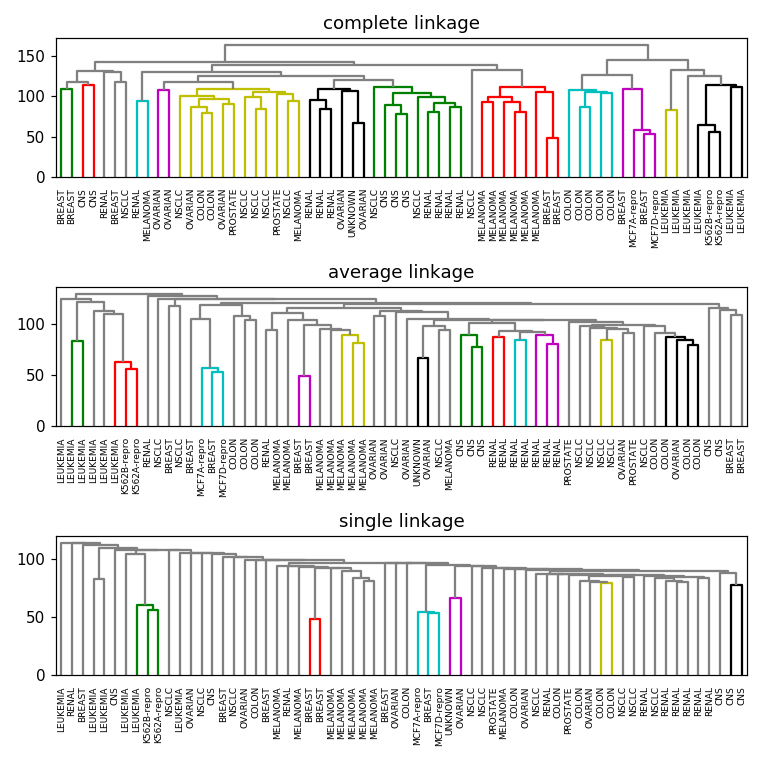

In [243]:
"""We now perform hierarchical clustering of the observations using complete,
single, and average linkage. Euclidean distance is used as the dissimilarity
measure"""

%matplotlib notebook
fig, axe = plt.subplots(3,1, figsize=(7, 7))
i=0
for method in ['complete', 'average', 'single']:
    
    hc = AgglomerativeClustering(linkage=method)
    hc.fit(x_sc)
    linked = linkage(x_sc, method=method)

    dendrogram(linked, ax=axe[i],
                orientation='top',
                labels=y['x'].tolist(),
                distance_sort='descending',
                show_leaf_counts=True,
              above_threshold_color='grey')
    axe[i].set_title(method +' linkage')
    i+=1
plt.tight_layout();

<IPython.core.display.Javascript object>


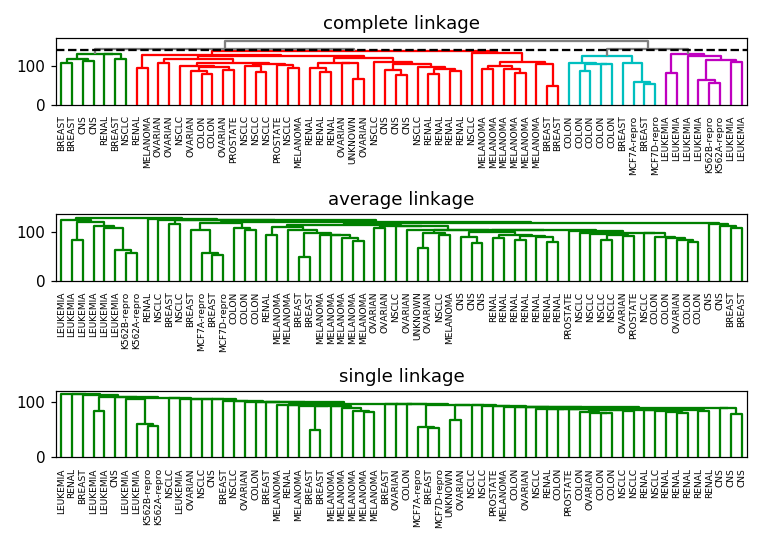

In [260]:
"""We can cut the dendrogram at the height that will yield a particular
number of clusters, say four"""

%matplotlib notebook
fig, axe = plt.subplots(3,1, figsize=(7, 5))
i=0
for method in ['complete', 'average', 'single']:
    
    hc = AgglomerativeClustering(linkage=method)
    hc.fit(x_sc)
    linked = linkage(x_sc, method=method)

    dendrogram(linked, ax=axe[i],
                orientation='top',
                labels=y['x'].tolist(),
                distance_sort='descending',
                show_leaf_counts=True,
              above_threshold_color='grey', color_threshold=140)
    axe[i].set_title(method +' linkage')
    axe[i].hlines(140, xmin = 0,xmax = x.shape[1], linestyle = '--')
    i+=1
plt.tight_layout();

### K-means clustering

In [278]:
# Note that different random_states result in different populations in each cluster
np.random.seed(2)

# Kmeans clustering
cluster = KMeans(n_clusters=4, n_init=20)

# Fit with simulated samples
cluster.fit(x_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [280]:
# Population of each cluster in k-means
labels = pd.Series(cluster.labels_)
labels.value_counts()

3    24
1    23
2    10
0     7
dtype: int64

<IPython.core.display.Javascript object>


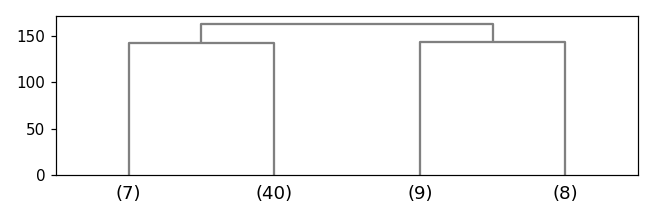

In [292]:
# Population of each cluster in each Hierarchical cluster
%matplotlib notebook
plt.figure(figsize = (6,2))
hc = AgglomerativeClustering(linkage='complete')
hc.fit(x_sc)
linked = linkage(x_sc, method='complete')

dendrogram(linked,
                orientation='top',
                labels=y['x'].tolist(),
                distance_sort='descending',
                show_leaf_counts=True,
              above_threshold_color='grey', p=4, truncate_mode='lastp', no_plot=False)
plt.tight_layout()

In [288]:
dendrogram(linked,
                orientation='top',
                labels=y['x'].tolist(),
                distance_sort='descending',
                show_leaf_counts=True,
              above_threshold_color='grey', p=4, truncate_mode='lastp', no_plot=True)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 142.3638001561674, 142.3638001561674, 0.0],
  [0.0, 144.05164345875073, 144.05164345875073, 0.0],
  [142.3638001561674,
   163.48974041519423,
   163.48974041519423,
   144.05164345875073]],
 'ivl': ['(7)', '(40)', '(9)', '(8)'],
 'leaves': [120, 123, 117, 121],
 'color_list': ['grey', 'grey', 'grey']}